# HW 3 Part 1 - Tim Demetriades
## Understanding the ROC Curve
March 5th, 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

I calculated the below ROC curve manually, but I could have also used the logistic regression model from sklearn.linear_model.

AUC = 0.6875


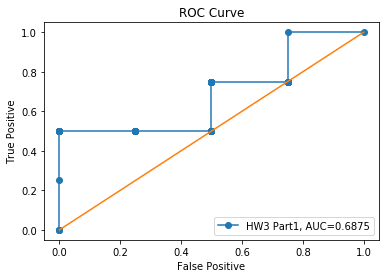

In [2]:
probabilities = np.array([0.967, 0.448, 0.568, 0.879, 0.015, 0.780, 0.978, 0.004])
classifications = np.array([1, 0, 1, 0, 1, 0, 1, 0])

# False positive rate 
fpr = []
# True positive rate
tpr = []

# Iterate thresholds from 0.0, 0.01, ..., 1.0
thresholds = np.arange(0.0, 1.01, .01)

# Get number of positive and negative examples in the dataset
p = sum(classifications)         # 4 positives here (1s)
n = len(classifications) - p     # 4 negatives here (0s)

# Iterate through all thresholds and determine fraction of true positives
# and false positives found at each threshold
for thresh in thresholds:
    fp = 0
    tp = 0
    for i in range(len(probabilities)):
        # Check if we're over current threshold and check if this is true or false
        if (probabilities[i] > thresh):    
            if classifications[i] == 1:    # true
                tp += 1
            if classifications[i] == 0:    # false
                fp += 1
    fpr.append(fp / float(n))
    tpr.append(tp / float(p))
    
# Calculate area under the curve (AUC)
auc = -(np.trapz(tpr, fpr))    # integrate roc curve with trapz
print('AUC =', auc)

# For drawing a diagonal line y=x for reference
x = [0, 1]
y = [0, 1]

# Plot graph
plt.plot(fpr, tpr, marker = 'o', label='HW3 Part1, AUC='+str(auc))
plt.legend(loc=4)
plt.plot(x, y)

plt.title("ROC Curve")
plt.xlabel("False Positive")
plt.ylabel("True Positive")

plt.show()